In [11]:
# 目的: 
# 因為已經處理好 2W 以內的>=20%大腦人工驗證
# 現在只需人工驗證 <20% >=10%的大腦即可
# 總共1331個
start_num = 0
end_num = 1331

In [12]:
# ===========================下方可以獨立執行，批量輸出挑選出來的體積差異度>=?% 的影像提供給人工檢驗===========================

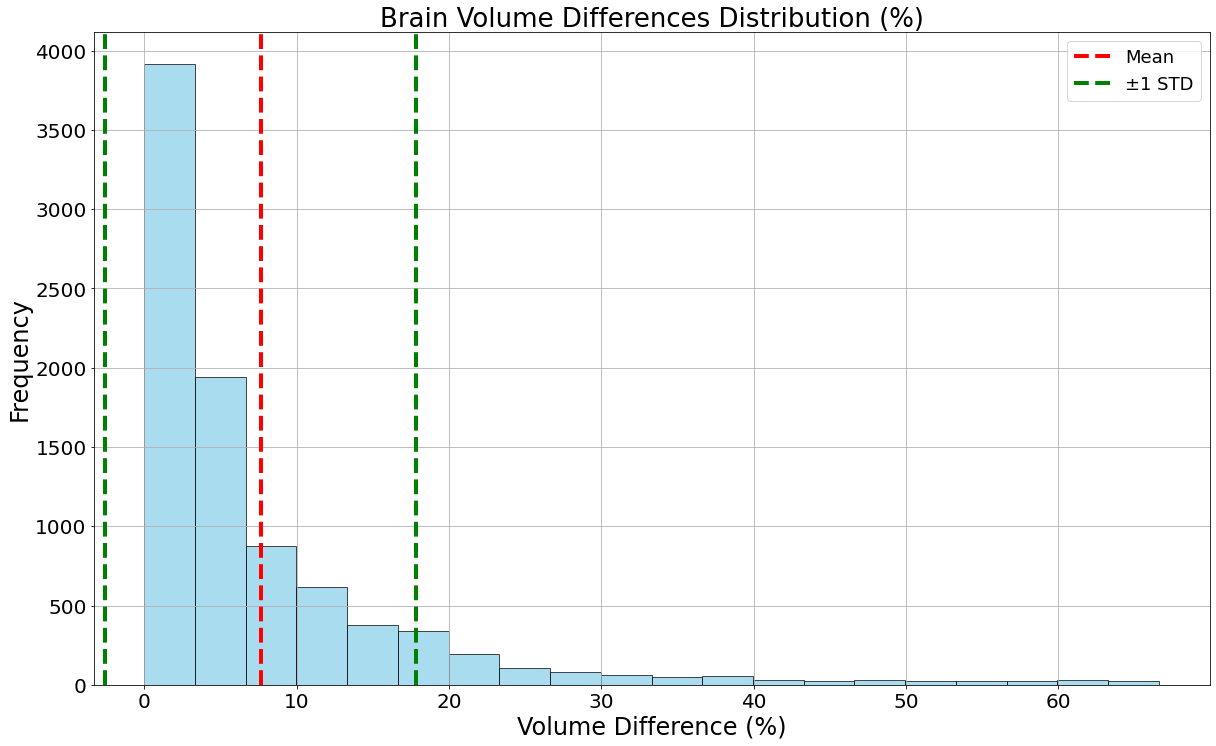

Mean Volume Difference (%): 7.629751630275638
Standard Deviation: 10.175426071043107
讀取的大腦總數:  22835
成功左右腦比對總數量:  8822
成功左右腦比對百分比:  38.6336763739873 %
*成功比對的總數只有5成的主因: 已經去除[失敗、單邊MB、兩個MB有相連]
**大多數去除的來自於單邊MB & 兩個MB有相連(細微相連也會被排除)
體積差異>10%數量: 2089 個 百分比: 23.67943776921333 %
體積差異>20%數量: 758 個 百分比: 8.592155973702107 %
體積差異>30%數量: 377 個 百分比: 4.2734073906143735 %
體積差異>40%數量: 210 個 百分比: 2.3804126048515077 %
體積差異>50%數量: 127 個 百分比: 1.4395828610292452 %
體積差異>60%數量: 58 個 百分比: 0.6574472908637498 %


In [13]:
# Step1 將體積誤差率>10的列出來 以及 >20的列出來 ==========================先合併20個列表(名稱一組、體積誤差率一組)共40個列表
# =======================================================
# 先繪製2萬顆大腦的體積誤差率分布圖
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import tifffile as tif
from skimage import measure
from scipy import ndimage
import pandas as pd
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
start_time_seg = time.time()
# NAS路徑設定
nas_path = '/mnt/nas_1/LoLab/kaiyi_hsu/LYNSU/'

# 列出指定路徑下所有項目
all_folder_list = os.listdir(nas_path)
all_folder_list.sort()
# 過濾出以 "使用者程序_第五階段存檔內容" 開頭的資料夾
stage_five_folders = [folder for folder in all_folder_list if folder.startswith('使用者程序_第五階段存檔內容')]

# 檢查當前資料夾有多少個 體積誤差百分比.npy 檔案
# 搜尋當前資料夾 尾巴有 體積誤差百分比.npy
finish_precentage_list = glob.glob(os.path.join('./', '*有處理的體積誤差百分比.npy'))
finish_precentage_list.sort()
# 要刪除的檔案名稱列表
to_delete = [
 './758個人工驗證完成_need_to_flip_有處理的體積誤差百分比.npy',
 './758個人工驗證完成_no_need_to_flip_有處理的體積誤差百分比.npy',
 './20000_21000_有處理的體積誤差百分比.npy',
 './21000_22000_有處理的體積誤差百分比.npy',
 './22000_22835_有處理的體積誤差百分比.npy'
]

# 使用列表理解來移除特定的檔案名稱
updated_filename_list = [file for file in finish_precentage_list if file not in to_delete]

finish_precentage_list = updated_filename_list
# =
finish_filename_list = glob.glob(os.path.join('./', '*有處理的檔案名稱.npy'))
finish_filename_list.sort()
# 要刪除的檔案名稱列表
to_delete = [
    './758個人工驗證完成_need_to_flip_有處理的檔案名稱.npy',
    './758個人工驗證完成_no_need_to_flip_有處理的檔案名稱.npy',
    './20000_21000_有處理的檔案名稱.npy',
    './21000_22000_有處理的檔案名稱.npy',
    './22000_22835_有處理的檔案名稱.npy'
]

# 使用列表理解來移除特定的檔案名稱
updated_filename_list = [file for file in finish_filename_list if file not in to_delete]

finish_filename_list = updated_filename_list
# 將體積誤差百分比(絕對值)繪製分布圖 ================這是繪製單一個1000個大腦的體積誤差率分布圖
# Initialize empty lists to store the loaded arrays
absolute_percentage_differences = []
used_files = []

# Load and concatenate the arrays for volume percentage differences
for file in finish_precentage_list:
    data = np.load(file)
    absolute_percentage_differences.append(data)

# Concatenate all arrays into one
absolute_percentage_differences = np.concatenate(absolute_percentage_differences, axis=0)

# Load and concatenate the arrays for used file names
for file in finish_filename_list:
    data = np.load(file)
    used_files.append(data)

# Concatenate all arrays into one
used_files = np.concatenate(used_files, axis=0)


# 计算百分比差异的平均值和标准差
mean_difference = np.mean(absolute_percentage_differences)
std_deviation = np.std(absolute_percentage_differences)

# 绘制体积差异百分比的分布图
plt.figure(figsize=(20, 12))
plt.hist(absolute_percentage_differences, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_difference, color='r', linestyle='dashed', linewidth=4, label='Mean')
plt.axvline(mean_difference - std_deviation, color='g', linestyle='dashed', linewidth=4, label='±1 STD')
plt.axvline(mean_difference + std_deviation, color='g', linestyle='dashed', linewidth=4)

plt.title('Brain Volume Differences Distribution (%)',size=26)
plt.xlabel('Volume Difference (%)',size=24)
plt.ylabel('Frequency',size=24)
plt.xticks(fontsize=20)  # X轴刻度字体大小
plt.yticks(fontsize=20)  # Y轴刻度字体大小
plt.grid(True)
plt.legend(fontsize='18')

# 显示图表
plt.show()

# # 计算左脑体积大（即百分比差异<0）和右脑体积大（即百分比差异>0）的数量
# left_larger = sum(diff < 0 for diff in percentage_differences)
# right_larger = sum(diff > 0 for diff in percentage_differences)

# print(f"Number of cases where the left brain is larger: {left_larger}")
# print(f"Number of cases where the right brain is larger: {right_larger}")

# 打印平均值和标准差
print(f"Mean Volume Difference (%): {mean_difference}")
print(f"Standard Deviation: {std_deviation}")
print('讀取的大腦總數: ','22835')
print('成功左右腦比對總數量: ',len(absolute_percentage_differences))
print('成功左右腦比對百分比: ',len(absolute_percentage_differences)/(22835)*100,'%')
print('*成功比對的總數只有5成的主因: 已經去除[失敗、單邊MB、兩個MB有相連]')
print('**大多數去除的來自於單邊MB & 兩個MB有相連(細微相連也會被排除)')
print('===============')
# 假设 absolute_percentage_differences 已经被定义并包含了所有元素的绝对值
count_greater_than_10 = len([x for x in absolute_percentage_differences if x >= 10])
print('體積差異>10%數量:',count_greater_than_10, '個 百分比:',count_greater_than_10/len(absolute_percentage_differences)*100,'%')
count_greater_than_20 = len([x for x in absolute_percentage_differences if x >= 20])
print('體積差異>20%數量:',count_greater_than_20, '個 百分比:',count_greater_than_20/len(absolute_percentage_differences)*100,'%')
count_greater_than_30 = len([x for x in absolute_percentage_differences if x >= 30])
print('體積差異>30%數量:',count_greater_than_30, '個 百分比:',count_greater_than_30/len(absolute_percentage_differences)*100,'%')
count_greater_than_40 = len([x for x in absolute_percentage_differences if x >= 40])
print('體積差異>40%數量:',count_greater_than_40, '個 百分比:',count_greater_than_40/len(absolute_percentage_differences)*100,'%')
count_greater_than_50 = len([x for x in absolute_percentage_differences if x >= 50])
print('體積差異>50%數量:', count_greater_than_50, '個 百分比:', count_greater_than_50 / len(absolute_percentage_differences) * 100, '%')
count_greater_than_60 = len([x for x in absolute_percentage_differences if x >= 60])
print('體積差異>60%數量:', count_greater_than_60, '個 百分比:', count_greater_than_60 / len(absolute_percentage_differences) * 100, '%')




# =======================================================
# 先評估10% 以上的數量 和 20%以上的數量，
# 將百分比閾值以上的體積誤差率輸出DLG & SEG投影圖(參考Step6輸出2D合併圖、最後在使用網頁提供人工確認(Step7))

In [14]:
# Step2 批量輸出758個 左右腦體積差異>20%的合併圖(DLG+SEG圖)
# 找到絕對百分比差異 < 20 的索引
# indices = np.where(absolute_percentage_differences < 20)[0] # ===============================這裡可以修改要調查多少體積差異%以上的圖片
indices = np.where((absolute_percentage_differences < 20) & (absolute_percentage_differences >= 10))[0]

# 輸出對應的檔案名稱
differences_big_then20_files = []
for index in indices:
    differences_big_then20_files.append(used_files[index])
# 用於存儲檔案路徑的字典
file_paths = {}

# 遍歷檔案名稱列表
for file_name in differences_big_then20_files:
    # filename 沒有包含附檔案名稱
    file_name_with_tif = file_name+'.tif'
    found = False
    # 對每個檔案名稱，檢查所有資料夾
    for folder in stage_five_folders:
        potential_path = os.path.join(nas_path, folder, file_name_with_tif)
        # 檢查檔案是否存在於當前資料夾
        if os.path.exists(potential_path):
            file_paths[file_name] = potential_path
            found = True
            break

# # 打印結果或進行後續處理
# for file_name, path in file_paths.items():
#     print(f"{file_name}: {path}")
# 已經提取到 758個檔案的SEG路徑
print('已經提取到',len(differences_big_then20_files),'個檔案的SEG路徑')
print('請將提取到的數字和上面分布圖的統計數字比對是否相等')

已經提取到 1331 個檔案的SEG路徑
請將提取到的數字和上面分布圖的統計數字比對是否相等


In [15]:
# ==============已經列出8064需要人工驗證==============
# ============要進行拆分成1000個檔案為單位============

In [16]:
# 取得本次範圍
differences_big_then20_files = differences_big_then20_files[start_num:end_num]

output_folder = "Female_Seg_correctly_"+str(start_num)+"_"+str(end_num)+"_in_2W"
print(len(differences_big_then20_files),output_folder)

1331 Female_Seg_correctly_0_1331_in_2W


In [ ]:
# Step3 開始批量輸出圖片至 Female_Seg_correctly_758_in_2W 資料夾
import numpy as np
import os
from PIL import Image
import tifffile as tif
import time  # 導入 time 模塊
def normalize_image(image):
    """
    归一化图像到0到255的范围。
    """
    # 计算图像的最大值和最小值
    min_val = np.min(image)
    max_val = np.max(image)
    # 归一化到0-1
    normalized_image = (image - min_val) / (max_val - min_val)
    # 缩放到0-255并转换为整数
    scaled_image = (normalized_image * 255).astype(np.uint8)
    return scaled_image
# 設定輸出資料夾
# output_folder = "Female_Seg_correctly_758_in_2W"
output_folder = "Female_Seg_correctly_"+str(start_num)+"_"+str(end_num)+"_in_2W"
output_dir = os.path.join(output_folder)
# 清空並創建 使用者程序_第一階段存檔內容_YOLO提取DLG 資料夾
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
else:
    for file in os.listdir(output_dir):
        os.remove(output_dir+'/' + file)
start_time = time.time()  # 記錄迴圈開始的時間
for file_name in differences_big_then20_files:
    seg_path = file_paths[file_name]
    # 將Seg路徑替換為DLG路徑
    dlg_path = seg_path.replace('Seg_MB', 'DLG')
    
    # 讀取圖像
    dlg_image = tif.imread(dlg_path)
    seg_image = tif.imread(seg_path)
    
    # 投影和归一化图像
    dlg_projection = np.sum(dlg_image[:len(dlg_image)//3, :, :], axis=0)
    seg_projection = np.sum(seg_image, axis=0)
    
    dlg_projection_normalized = normalize_image(dlg_projection)
    seg_projection_normalized = normalize_image(seg_projection)
    
    # 合并图像
    combined_image = np.concatenate((dlg_projection_normalized, seg_projection_normalized), axis=1)
    
    # 儲存合併後的圖像，文件名使用SEG文件名去除前缀和文件扩展名
    save_file_name = file_name.split('_')[2] + '.png'  # 從 'Seg_MB_104198-F-200004' 獲得 '104198-F-200004.png'
    save_path = os.path.join(output_dir, save_file_name)
    Image.fromarray(combined_image).save(save_path)
end_time = time.time()  # 記錄迴圈結束的時間
total_time = end_time - start_time  # 計算總耗時
print(f"批量處理完成，已合併並輸出 {len(differences_big_then20_files)} 張圖像。耗時: {total_time} 秒")


In [23]:
print(f"批量處理完成，已合併並輸出 {len(differences_big_then20_files)} 張圖像。耗時: {total_time} 秒")

批量處理完成，已合併並輸出 1331 張圖像。耗時: 7239.515917778015 秒


In [ ]:
# ========================下面要開啟專門的網頁進行人工驗證========================

In [ ]:
test_list = os.listdir("Female_Seg_correctly_0_1331_in_2W")

In [22]:
len(test_list)

1331

In [ ]:
# ===================以上已經輸出了本次特別調查的合併圖至資料夾，開始人工驗證===================

In [1]:
# Step7 只須執行此段即可進行人工驗證================
# =============最終正式版本
# 5-HT1B-F-400000.png
# 5-HT1B-F-000005,5-HT1B-F-000004 這兩個DLG一樣，只差在單一神經元拍不同張
import os
import shutil
import base64
from dash import Dash, html, dcc, Input, Output, State
from jupyter_dash import JupyterDash
import dash
from PIL import Image
import io

# 設定資料夹
output_folder = "Female_Seg_correctly_0_1331_in_2W"
no_mb_folder = os.path.join(output_folder, 'No_MB_in_DLG')
segmb_failed_folder = os.path.join(output_folder, 'SegMB_failed')
single_mb_folder = os.path.join(output_folder, 'Single_MB')  # 新增
need_to_flip_folder = os.path.join(output_folder, 'Need_to_flip')  # 新增
no_need_to_flip_folder = os.path.join(output_folder, 'No_Need_to_flip')  # 新增

# 创建新的文件夹，如果不存在的话
for folder in [segmb_failed_folder, no_mb_folder, single_mb_folder, need_to_flip_folder,no_need_to_flip_folder]:
    if not os.path.exists(folder):
        os.makedirs(folder)

# 获取所有图片文件并排序
Done_2D_DLG_Seg = [f for f in sorted(os.listdir(output_folder)) if f.endswith('.png')]

app = JupyterDash(__name__)

app.layout = html.Div([
    dcc.Store(id='image-index', data=0),
    dcc.Store(id='review-stage', data='mb_check'),
    html.H1(id='page-title', children="Is there MB in DLG?"),
    html.Div(id='image-name', children=''),
    html.Img(id='image-display', src=''),
    html.Button("YES", id='button-yes', n_clicks=0, style={'width': '150px', 'height': '50px', 'fontSize': '20px', 'margin': '10px'}),
    html.Button("NO", id='button-no', n_clicks=0, style={'width': '150px', 'height': '50px', 'fontSize': '20px', 'margin': '10px'}),
    html.Div(id='image-count', style={'marginTop': '20px'}),
], style={'textAlign': 'center'})


@app.callback(
    [Output('image-display', 'src'),
     Output('image-name', 'children'),
     Output('page-title', 'children'),
     Output('review-stage', 'data'),
     Output('image-count', 'children')],
    [Input('button-yes', 'n_clicks'),
     Input('button-no', 'n_clicks')],
    [State('review-stage', 'data')]
)
def update_image_display(btn_yes, btn_no, stage):
    # 获取所有图片文件并排序
    Done_2D_DLG_Seg = [f for f in sorted(os.listdir(output_folder)) if f.endswith('.png')]
    ctx = dash.callback_context
    if not ctx.triggered:
        stage = 'mb_check'
    else:
        button_id = ctx.triggered[0]['prop_id'].split('.')[0]
        if button_id == 'button-yes':
            if stage == 'mb_check':
                stage = 'segmb_check'
            elif stage == 'segmb_check':
                stage = 'single_mb_check'  # 进入第三页
            elif stage == 'single_mb_check':
                # 移动图片到 Single_MB 文件夹
                src_path = os.path.join(output_folder, Done_2D_DLG_Seg[0])
                dst_path = os.path.join(single_mb_folder, Done_2D_DLG_Seg[0])
                shutil.move(src_path, dst_path)
                stage = 'mb_check'  # 返回第一阶段
            elif stage == 'need_to_flip_check':
                # 移动图片到 Need_to_flip 文件夹
                src_path = os.path.join(output_folder, Done_2D_DLG_Seg[0])
                dst_path = os.path.join(need_to_flip_folder, Done_2D_DLG_Seg[0])
                shutil.move(src_path, dst_path)
                stage = 'mb_check'  # 返回第一阶段
        elif button_id == 'button-no':
            if stage == 'mb_check':
                src_path = os.path.join(output_folder, Done_2D_DLG_Seg[0])
                dst_path = os.path.join(no_mb_folder, Done_2D_DLG_Seg[0])
                shutil.move(src_path, dst_path)
                stage = 'mb_check' # 返回第一阶段
            elif stage == 'segmb_check':
                src_path = os.path.join(output_folder, Done_2D_DLG_Seg[0])
                dst_path = os.path.join(segmb_failed_folder, Done_2D_DLG_Seg[0])
                shutil.move(src_path, dst_path)

                stage = 'mb_check' # 返回第一阶段
            elif stage == 'single_mb_check':
                stage = 'need_to_flip_check' # 进入第四页
            elif stage == 'need_to_flip_check':
                # 移动图片到 No_Need_to_flip 文件夹
                # ================================================
                src_path = os.path.join(output_folder, Done_2D_DLG_Seg[0])
                dst_path = os.path.join(no_need_to_flip_folder, Done_2D_DLG_Seg[0])
                shutil.move(src_path, dst_path)

                stage = 'mb_check' # 返回第一阶段，准备下一张图片
    # 获取所有图片文件并排序
    Done_2D_DLG_Seg = [f for f in sorted(os.listdir(output_folder)) if f.endswith('.png')]
    # 生成新图像的base64编码和文件名
    if Done_2D_DLG_Seg !=[]:
        file_path = os.path.join(output_folder, Done_2D_DLG_Seg[0])
        encoded_image = base64.b64encode(open(file_path, 'rb').read()).decode('ascii')
        src_data = f'data:image/png;base64,{encoded_image}'
    else:
        # 如果所有图片都已经审核完毕
        return dash.no_update, '所有图片审核完毕', dash.no_update, dash.no_update, dash.no_update, dash.no_update

    # 更新页面标题
    if stage == 'mb_check':
        page_title = "Is there MB in DLG?"
    elif stage == 'segmb_check':
        page_title = "Is Seg MB correct?"
    elif stage == 'single_mb_check':
        page_title = "Is it a single MB?"
    elif stage == 'need_to_flip_check':
        page_title = "Need to flip?"
        
    # 计算剩余未处理图片数量
    remaining_images = len(Done_2D_DLG_Seg)
    # 更新页面底部的未处理图片数量
    image_count_text = f"Remaining images to process: {remaining_images}"

    return src_data, Done_2D_DLG_Seg[0], page_title, stage, image_count_text
app.run_server(mode='external', port=18339 , host='0.0.0.0')

Dash app running on http://0.0.0.0:18339/


In [5]:
# ========================下方要繪製0_1000的分布圖========================
# ========================要改讀取的資料夾名稱、文件名前缀(file_name_prefix)========================
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import tifffile as tif
from skimage import measure
from scipy import ndimage
import pandas as pd
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
start_time_seg = time.time()
# NAS路徑設定
nas_path = '/mnt/nas_1/LoLab/kaiyi_hsu/LYNSU/'

# 列出指定路徑下所有項目
all_folder_list = os.listdir(nas_path)
all_folder_list.sort()
# 過濾出以 "使用者程序_第五階段存檔內容" 開頭的資料夾
stage_five_folders = [folder for folder in all_folder_list if folder.startswith('使用者程序_第五階段存檔內容')]

In [6]:
# Step8  先計算暫時分析準確度: 1- (SegMB_failed總數/ (758-No_MB_in_DLG){這是總體-沒有MB的}) *100%
import os

# Define the paths to the two directories
dir_path_segmb_failed = "Female_Seg_correctly_0_1331_in_2W/SegMB_failed"#========================
dir_path_no_mb_in_dlg = "Female_Seg_correctly_0_1331_in_2W/No_MB_in_DLG"#========================

# Function to count files in a directory
def count_files_in_directory(directory_path):
    return len([name for name in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, name))])

# Count files in each directory
segmb_failed_count = count_files_in_directory(dir_path_segmb_failed)
no_mb_in_dlg_count = count_files_in_directory(dir_path_no_mb_in_dlg)

# Calculate accuracy
accuracy = (1 - (segmb_failed_count / (1331 - no_mb_in_dlg_count))) * 100

print("失敗的數量: ",segmb_failed_count)
print("原始無MB的數量: ",no_mb_in_dlg_count)
print("成功切割數量百分比: ",round(accuracy,3),"%")

失敗的數量:  117
原始無MB的數量:  2
成功切割數量百分比:  91.196 %


In [7]:
# ================================

In [8]:
# 完成人工驗證後需要針對需要翻轉的DLG檔案進行翻轉，翻轉後再進行一次分析左右腦分布圖

# 讀取 Female_Seg_correctly_758_in_2W/Need_to_flip 裡面的檔案名稱 建立一個 Need_to_flip_list
# 讀取 Female_Seg_correctly_758_in_2W/No_Need_to_flip 裡面的檔案名稱 建立一個 No_Need_to_flip_list
# 尋找 Need_to_flip_list & No_Need_to_flip_list 的Seg檔案絕對路徑 輸出 Need_to_flip_path_list & No_Need_to_flip_path_list

# 使用上方平行化代碼讀取 Need_to_flip_path_list 檔案並使用Step4中的Step2 翻轉後再讀取 No_Need_to_flip_path_list 的檔案去分析左右腦大小差異
# **使用平行化代碼時: 
# 注意folder = stage_five_folders[iiii] 移除，要注意輸出npy檔案名稱要自己撰寫(原本使用folder)
# 注意label_files 就是所有要讀取的檔案路徑 ，但一如果是 Need_to_flip_path_list 需要讀取後翻轉在計算
# 注意從平行化內的單個文件處理: label = tif.imread(file_path) 這裡要判斷file_path是否屬於 Need_to_flip_path_list，要記得翻轉(判斷句)

In [9]:
# Step9 先找到需要翻轉和不用翻轉的檔案的絕對路徑
import os

# 假定的 NAS 路徑
nas_path = '/mnt/nas_1/LoLab/kaiyi_hsu/LYNSU/'

# 設定資料夾路徑
need_to_flip_dir = os.path.join("Female_Seg_correctly_0_1331_in_2W", "Need_to_flip")#========================
no_need_to_flip_dir = os.path.join("Female_Seg_correctly_0_1331_in_2W", "No_Need_to_flip")#========================

# # 讀取檔案名稱，建立列表
# def read_filenames_from_directory(directory_path):
#     return [name for name in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, name))]
# 讀取檔案名稱，建立列表，去除副檔名並加前綴 "Seg_MB_"
def read_filenames_from_directory_with_prefix(directory_path):
    return ["Seg_MB_" + os.path.splitext(name)[0] for name in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, name))]


Need_to_flip_list = read_filenames_from_directory_with_prefix(need_to_flip_dir)
No_Need_to_flip_list = read_filenames_from_directory_with_prefix(no_need_to_flip_dir)

# 搜尋並映射檔案路徑
def find_file_paths(file_names, search_folders, nas_path):
    file_paths = {}
    for file_name in file_names:
        file_name_with_ext = file_name+'.tif'
#         file_name_with_ext = file_name  # 假定檔案名已包含副檔名
        found = False
        for folder in search_folders:
            potential_path = os.path.join(nas_path, folder, file_name_with_ext)
            if os.path.exists(potential_path):
                file_paths[file_name] = potential_path
                found = True
                break
    return file_paths

# 需要搜尋的資料夾列表
# 過濾出以 "使用者程序_第五階段存檔內容" 開頭的資料夾
search_folders = [folder for folder in all_folder_list if folder.startswith('使用者程序_第五階段存檔內容')]

# 尋找並建立路徑列表
Need_to_flip_path_list = find_file_paths(Need_to_flip_list, search_folders, nas_path)
No_Need_to_flip_path_list = find_file_paths(No_Need_to_flip_list, search_folders, nas_path)

# 從 Need_to_flip_path_list 字典中提取絕對路徑
need_to_flip_path_values = list(Need_to_flip_path_list.values())
# 從 No_Need_to_flip_path_list 字典中提取絕對路徑
no_need_to_flip_path_values = list(No_Need_to_flip_path_list.values())


In [10]:
len(no_need_to_flip_path_values)

387

In [11]:
len(need_to_flip_path_values)

154

In [6]:
# Step10 
# 使用上方平行化代碼讀取 Need_to_flip_path_list 檔案並使用Step4中的Step2 翻轉後再讀取 No_Need_to_flip_path_list 的檔案去分析左右腦大小差異
# **使用平行化代碼時: 
# 注意folder = stage_five_folders[iiii] 移除，要注意輸出npy檔案名稱要自己撰寫(原本使用 folder)
# 注意label_files 就是所有要讀取的檔案路徑 ，但一如果是 Need_to_flip_path_list 需要讀取後翻轉在計算
# 注意從平行化內的單個文件處理: label = tif.imread(file_path) 這裡要判斷file_path是否屬於 Need_to_flip_path_list，要記得翻轉(判斷句)


# 先處理無須翻轉的部分 ================= no_need_to_flip_path_values
# 將所有要讀取的檔案路徑放到 label_files
# 搜尋該資料夾內所有的 Label 檔案
label_files = no_need_to_flip_path_values
label_files.sort()
start_time_seg = time.time()
# 定义处理单个文件的函数
def process_file(file_path):
    try:
        label = tif.imread(file_path)
        labels = measure.label(label, connectivity=1)
        regions = measure.regionprops(labels)
        regions_sorted_by_area = sorted(regions, key=lambda x: x.area, reverse=True)

        if len(regions_sorted_by_area) < 2 or regions_sorted_by_area[0].area / regions_sorted_by_area[1].area > 2:
            # 返回 None 或其他标志以表示跳过的文件
            return file_path, None, None

        left_brain = np.zeros_like(label)
        right_brain = np.zeros_like(label)

        centroid1 = regions_sorted_by_area[0].centroid
        centroid2 = regions_sorted_by_area[1].centroid
        left_index, right_index = (0, 1) if centroid1[2] < centroid2[2] else (1, 0)

        for coord in regions_sorted_by_area[left_index].coords:
            left_brain[coord[0], coord[1], coord[2]] = 1
        for coord in regions_sorted_by_area[right_index].coords:
            right_brain[coord[0], coord[1], coord[2]] = 1

        return file_path, np.sum(left_brain), np.sum(right_brain)
    except Exception as e:
        return file_path, None, None

# 使用 ThreadPoolExecutor 来并行处理文件
with ThreadPoolExecutor(max_workers=8) as executor:
    # 提交所有文件到线程池
    futures = [executor.submit(process_file, file_path) for file_path in label_files]

    # 初始化列表用于存储结果
    used_files = []
    left_volumes = []
    right_volumes = []

    # 等待每个任务完成并处理结果
    for future in as_completed(futures):
        file_path, left_volume, right_volume = future.result()
        if left_volume is not None and right_volume is not None:
            # 根据需要处理有效结果
            used_files.append(file_path.split('/')[-1][:-4])
            left_volumes.append(left_volume)
            right_volumes.append(right_volume)


# 製作成列表，並計算出 absolute_percentage_differences
# 转换为浮点型以避免溢出
left_volumes_float = [float(v) for v in left_volumes]
right_volumes_float = [float(v) for v in right_volumes]
# 计算平均体积
average_volumes = [(lv + rv) / 2.0 for lv, rv in zip(left_volumes_float, right_volumes_float)]

# 计算体积差异及其百分比
volume_differences = [rv - lv for lv, rv in zip(left_volumes_float, right_volumes_float)]
percentage_differences = [100.0 * (diff / avg) for diff, avg in zip(volume_differences, average_volumes)]

# 取絕對值
absolute_percentage_differences = [abs(x) for x in percentage_differences]

# 輸出儲存 used_files & absolute_percentage_differences


# 文件名前缀
file_name_prefix = '0_1331個人工驗證完成_no_need_to_flip_母果蠅'  # 例如："0_1000" ========================================要改

# 保存 used_files 为 .npy 文件
np.save(f'{file_name_prefix}_有處理的檔案名稱.npy', np.array(used_files))

# # 保存 absolute_percentage_differences 为 .npy 文件
# np.save(f'{file_name_prefix}_有處理的體積誤差百分比.npy', np.array(absolute_percentage_differences))

# 保存 percentage_differences 为 .npy 文件
np.save(f'{file_name_prefix}_有處理的體積誤差百分比.npy', np.array(percentage_differences))


print(f"已保存：\n{file_name_prefix}_有處理的檔案名稱.npy\n{file_name_prefix}_有處理的體積誤差百分比.npy")
end_time_seg = time.time()
print("完成，总耗时: {:.2f} 秒".format(end_time_seg - start_time_seg))
print('=====================================================')

已保存：
0_1331個人工驗證完成_no_need_to_flip_母果蠅_有處理的檔案名稱.npy
0_1331個人工驗證完成_no_need_to_flip_母果蠅_有處理的體積誤差百分比.npy
完成，总耗时: 812.12 秒


In [7]:
no_need_to_flip_time = end_time_seg - start_time_seg
print("完成，总耗时: {:.2f} 秒".format(no_need_to_flip_time))

完成，总耗时: 812.12 秒


In [ ]:
# Step11 接著處理要翻轉的部分
# 先處理無須翻轉的部分 ================= need_to_flip_path_values
# 將所有要讀取的檔案路徑放到 label_files
# 搜尋該資料夾內所有的 Label 檔案
label_files = need_to_flip_path_values
label_files.sort()
start_time_seg = time.time()
# 定义处理单个文件的函数 =================這裡要修改翻轉
def process_file(file_path):
    try:
        label = tif.imread(file_path)
        # 沿著 Z 軸翻轉
#         label = label[::-1]
        labels = measure.label(label, connectivity=1)
        regions = measure.regionprops(labels)
        regions_sorted_by_area = sorted(regions, key=lambda x: x.area, reverse=True)

        if len(regions_sorted_by_area) < 2 or regions_sorted_by_area[0].area / regions_sorted_by_area[1].area > 2:
            # 返回 None 或其他标志以表示跳过的文件
            return file_path, None, None

        left_brain = np.zeros_like(label)
        right_brain = np.zeros_like(label)

        centroid1 = regions_sorted_by_area[0].centroid
        centroid2 = regions_sorted_by_area[1].centroid
        # 只需要改這裡================= 需要翻轉改成 >   原本是{<}
        left_index, right_index = (0, 1) if centroid1[2] > centroid2[2] else (1, 0)

        for coord in regions_sorted_by_area[left_index].coords:
            left_brain[coord[0], coord[1], coord[2]] = 1
        for coord in regions_sorted_by_area[right_index].coords:
            right_brain[coord[0], coord[1], coord[2]] = 1

        return file_path, np.sum(left_brain), np.sum(right_brain)
    except Exception as e:
        return file_path, None, None

# 使用 ThreadPoolExecutor 来并行处理文件
with ThreadPoolExecutor(max_workers=8) as executor:
    # 提交所有文件到线程池
    futures = [executor.submit(process_file, file_path) for file_path in label_files]

    # 初始化列表用于存储结果
    used_files = []
    left_volumes = []
    right_volumes = []

    # 等待每个任务完成并处理结果
    for future in as_completed(futures):
        file_path, left_volume, right_volume = future.result()
        if left_volume is not None and right_volume is not None:
            # 根据需要处理有效结果
            used_files.append(file_path.split('/')[-1][:-4])
            left_volumes.append(left_volume)
            right_volumes.append(right_volume)


# 製作成列表，並計算出 absolute_percentage_differences
# 转换为浮点型以避免溢出
left_volumes_float = [float(v) for v in left_volumes]
right_volumes_float = [float(v) for v in right_volumes]
# 计算平均体积
average_volumes = [(lv + rv) / 2.0 for lv, rv in zip(left_volumes_float, right_volumes_float)]

# 计算体积差异及其百分比
volume_differences = [rv - lv for lv, rv in zip(left_volumes_float, right_volumes_float)]
percentage_differences = [100.0 * (diff / avg) for diff, avg in zip(volume_differences, average_volumes)]

# 取絕對值
absolute_percentage_differences = [abs(x) for x in percentage_differences]

# 輸出儲存 used_files & absolute_percentage_differences


# 文件名前缀
file_name_prefix = '0_1331個人工驗證完成_need_to_flip_母果蠅'  # 例如："0_1000" ========================================要改

# 保存 used_files 为 .npy 文件
np.save(f'{file_name_prefix}_有處理的檔案名稱.npy', np.array(used_files))

# # 保存 absolute_percentage_differences 为 .npy 文件
# np.save(f'{file_name_prefix}_有處理的體積誤差百分比.npy', np.array(absolute_percentage_differences))

# 保存 percentage_differences 为 .npy 文件
np.save(f'{file_name_prefix}_有處理的體積誤差百分比.npy', np.array(percentage_differences))


print(f"已保存：\n{file_name_prefix}_有處理的檔案名稱.npy\n{file_name_prefix}_有處理的體積誤差百分比.npy")
end_time_seg = time.time()
print("完成，总耗时: {:.2f} 秒".format(end_time_seg - start_time_seg))
print('=====================================================')

In [ ]:
need_to_flip_time = end_time_seg - start_time_seg
print("完成，总耗时: {:.2f} 秒".format(need_to_flip_time))

In [ ]:
print("完成，总耗时: {:.2f} 秒".format(need_to_flip_time))

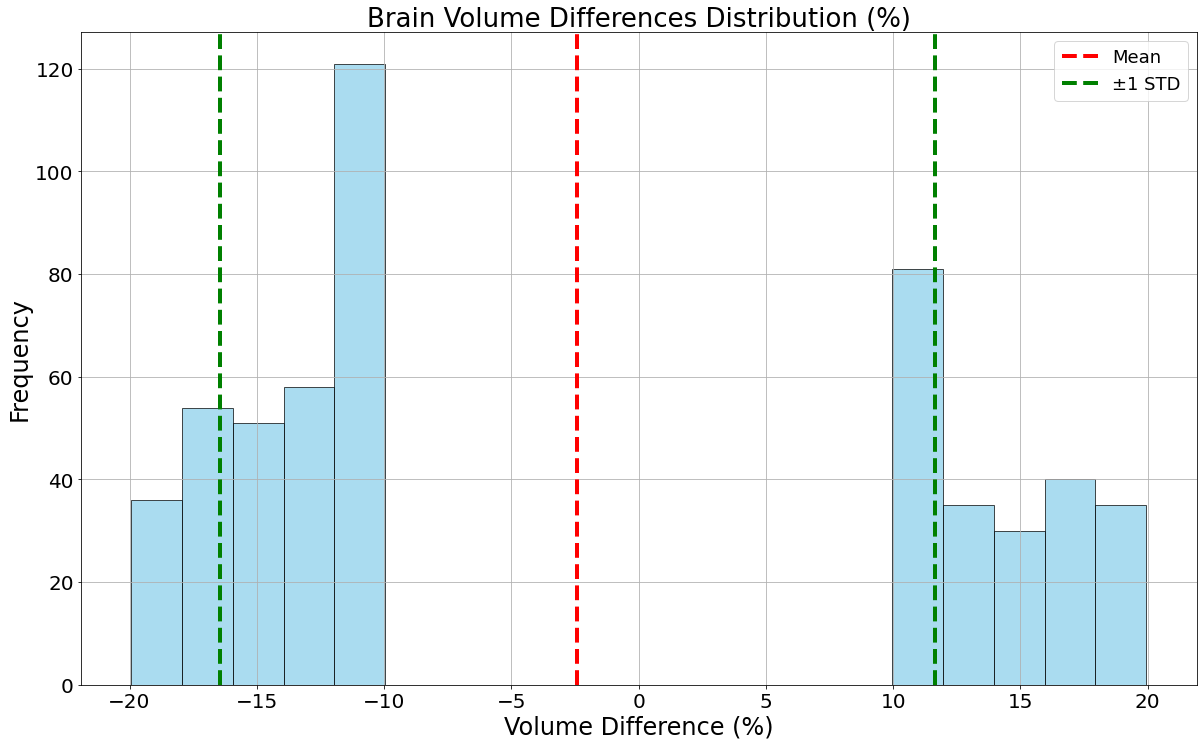

Mean Volume Difference (%): -2.4036527597232373
Standard Deviation: 14.029162908363416
讀取的大腦總數:  541
成功左右腦比對總數量:  541
左腦>右腦的數量: 320 個 百分比: 59.15 %
左腦<右腦的數量: 221 個 百分比: 40.85 %
左腦和右腦差異: 18.299 %


In [15]:
# Step12 先繪製大腦的體積誤差率分布圖
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import tifffile as tif
from skimage import measure
from scipy import ndimage
import pandas as pd
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
start_time_seg = time.time()
# NAS路徑設定
nas_path = '/mnt/nas_1/LoLab/kaiyi_hsu/LYNSU/'

# 列出指定路徑下所有項目
all_folder_list = os.listdir(nas_path)
all_folder_list.sort()
# 過濾出以 "使用者程序_第五階段存檔內容" 開頭的資料夾
stage_five_folders = [folder for folder in all_folder_list if folder.startswith('使用者程序_第五階段存檔內容')]

# 檢查當前資料夾有多少個 體積誤差百分比.npy 檔案
# 搜尋當前資料夾 尾巴有 體積誤差百分比.npy
finish_precentage_list = glob.glob(os.path.join('./', '0_1331個人工驗證完成*體積誤差百分比.npy'))# 例如："0_1000" ========================================要改
finish_precentage_list.sort()
# =
finish_filename_list = glob.glob(os.path.join('./', '0_1331個人工驗證完成*有處理的檔案名稱.npy'))# 例如："0_1000" ========================================要改
finish_filename_list.sort()

# 將體積誤差百分比(絕對值)繪製分布圖 ================這是繪製單一個1000個大腦的體積誤差率分布圖
# Initialize empty lists to store the loaded arrays
absolute_percentage_differences = []
used_files = []

# Load and concatenate the arrays for volume percentage differences
for file in finish_precentage_list:
    data = np.load(file)
    absolute_percentage_differences.append(data)

# Concatenate all arrays into one
absolute_percentage_differences = np.concatenate(absolute_percentage_differences, axis=0)

# Load and concatenate the arrays for used file names
for file in finish_filename_list:
    data = np.load(file)
    used_files.append(data)

# Concatenate all arrays into one
used_files = np.concatenate(used_files, axis=0)


# 计算百分比差异的平均值和标准差
mean_difference = np.mean(absolute_percentage_differences)
std_deviation = np.std(absolute_percentage_differences)

# 绘制体积差异百分比的分布图
plt.figure(figsize=(20, 12))
plt.hist(absolute_percentage_differences, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_difference, color='r', linestyle='dashed', linewidth=4, label='Mean')
plt.axvline(mean_difference - std_deviation, color='g', linestyle='dashed', linewidth=4, label='±1 STD')
plt.axvline(mean_difference + std_deviation, color='g', linestyle='dashed', linewidth=4)

plt.title('Brain Volume Differences Distribution (%)',size=26)
plt.xlabel('Volume Difference (%)',size=24)
plt.ylabel('Frequency',size=24)
plt.xticks(fontsize=20)  # X轴刻度字体大小
plt.yticks(fontsize=20)  # Y轴刻度字体大小
plt.grid(True)
plt.legend(fontsize='18')

# 显示图表
plt.show()

# # 计算左脑体积大（即百分比差异<0）和右脑体积大（即百分比差异>0）的数量
# left_larger = sum(diff < 0 for diff in percentage_differences)
# right_larger = sum(diff > 0 for diff in percentage_differences)

# print(f"Number of cases where the left brain is larger: {left_larger}")
# print(f"Number of cases where the right brain is larger: {right_larger}")


# 打印平均值和标准差
print(f"Mean Volume Difference (%): {mean_difference}")
print(f"Standard Deviation: {std_deviation}")
print('讀取的大腦總數: ',len(absolute_percentage_differences))
print('成功左右腦比對總數量: ',len(absolute_percentage_differences))
# print('成功左右腦比對百分比: ',len(absolute_percentage_differences)/(len(absolute_percentage_differences))*100,'%')
# print('*成功比對的總數只有5成的主因: 已經去除[失敗、單邊MB、兩個MB有相連]')
# print('**大多數去除的來自於單邊MB & 兩個MB有相連(細微相連也會被排除)')
print('===============')
# # 假设 absolute_percentage_differences 已经被定义并包含了所有元素的绝对值
# count_greater_than_10 = len([x for x in absolute_percentage_differences if x >= 10 ])
# print('體積差異>10%數量:',count_greater_than_10, '個 百分比:',count_greater_than_10/len(absolute_percentage_differences)*100,'%')
# count_greater_than_20 = len([x for x in absolute_percentage_differences if x >= 20])
# print('體積差異>20%數量:',count_greater_than_20, '個 百分比:',count_greater_than_20/len(absolute_percentage_differences)*100,'%')
# count_greater_than_30 = len([x for x in absolute_percentage_differences if x >= 30])
# print('體積差異>30%數量:',count_greater_than_30, '個 百分比:',count_greater_than_30/len(absolute_percentage_differences)*100,'%')
# count_greater_than_40 = len([x for x in absolute_percentage_differences if x >= 40])
# print('體積差異>40%數量:',count_greater_than_40, '個 百分比:',count_greater_than_40/len(absolute_percentage_differences)*100,'%')
# count_greater_than_50 = len([x for x in absolute_percentage_differences if x >= 50])
# print('體積差異>50%數量:', count_greater_than_50, '個 百分比:', count_greater_than_50 / len(absolute_percentage_differences) * 100, '%')
# count_greater_than_60 = len([x for x in absolute_percentage_differences if x >= 60])
# print('體積差異>60%數量:', count_greater_than_60, '個 百分比:', count_greater_than_60 / len(absolute_percentage_differences) * 100, '%')
count_greater_left_big = len([x for x in absolute_percentage_differences if x <= 0 ])
print('左腦>右腦的數量:',count_greater_left_big,'個 百分比:',round(count_greater_left_big/len(absolute_percentage_differences)*100,3),'%')
count_greater_right_big = len([x for x in absolute_percentage_differences if x >= 0 ])
print('左腦<右腦的數量:',count_greater_right_big,'個 百分比:',round(count_greater_right_big/len(absolute_percentage_differences)*100,3),'%')

print('左腦和右腦差異:',round(abs(count_greater_left_big/len(absolute_percentage_differences)-count_greater_right_big/len(absolute_percentage_differences))*100,3),'%')
# =======================================================
# 先評估10% 以上的數量 和 20%以上的數量，
# 將百分比閾值以上的體積誤差率輸出DLG & SEG投影圖(參考Step6輸出2D合併圖、最後在使用網頁提供人工確認(Step7))

In [ ]:
np.where(absolute_percentage_differences>40)

In [ ]:
np.where(absolute_percentage_differences<-40)